In [12]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Function to calculate selectivity index
def calculate_selectivity(syllable_counts):
    #syllable_probabilities = syllable_counts / syllable_counts.sum(axis=1, keepdims=True)
    syllable_probabilities = syllable_counts.div(syllable_counts.sum(axis=1), axis=0)
    entropies = entropy(syllable_probabilities.T, base=2)
    selectivity = 1 - entropies
    return selectivity

In [19]:
# Function to calculate selectivity index
def calculate_selectivity(syllable_counts):
    syllable_probabilities = syllable_counts.div(syllable_counts.sum(axis=1), axis=0)
    print("Syllable Probabilities (head):")
    print(syllable_probabilities.head())  # Inspect the probabilities to ensure they're correct

    entropies = entropy(syllable_probabilities.T, base=2)
    print("Entropies:")
    print(entropies)  # Check the entropy values to make sure they are non-negative

    selectivity = 1 - entropies
    print("Selectivity:")
    print(selectivity)  # Verify that selectivity values are in the expected range
    return selectivity

# Inside the loop where syllable_counts is calculated:
# Print the sum of syllable counts for validation
print("Syllable Counts Sum (head):")
print(syllable_counts.sum(axis=1).head())  # Check row sums to ensure normalization is done correctly


Syllable Counts Sum (head):
6.0    5948
dtype: int64


In [15]:
## For Batch 4
os.chdir('/Users/joshwoah/Documents/University of Toronto/Postdoc Research/GitHub Postdoc/KeyPointMoSeq Results/Batch 4 KeyPointMoSeq Results')

# Define the electrode pairs and trials
electrode_pairs = ["E3_34 and E14_46", "E3_34 and E27_58", "E14_46 and E27_58"]
trials = [1, 2, 3]

In [20]:
# Initialize a DataFrame to store results
selectivity_results = pd.DataFrame()

# Iterate over electrode pairs
for pair in electrode_pairs:
    all_syllable_data = []

    # Iterate over trials for the current pair
    for trial in trials:
        # Generate the filename pattern
        file_pattern = f"TIS {pair} ({trial})DLC_resnet50_fourth_batchMay15shuffle1_400000_filtered.csv"

        # Find the file (assuming unique matches)
        file_path = glob.glob(file_pattern)

        if file_path:
            file_path = file_path[0]  # Get the first match
            # Load the CSV and extract the 'syllable' column
            data = pd.read_csv(file_path)
            syllables = data['syllable']

            # Append to the list
            all_syllable_data.append(syllables)
        else:
            print(f"File not found: {file_pattern}")

    # Combine all trials into a single DataFrame for this electrode pair
    if all_syllable_data:
        combined_data = pd.concat(all_syllable_data, axis=1)
        combined_data.columns = [f"Trial {t}" for t in trials]

        # Count occurrences of each syllable across all trials
        syllable_counts = combined_data.apply(pd.Series.value_counts).fillna(0)

        # Compute selectivity index
        selectivity = calculate_selectivity(syllable_counts)

    # Store results
        pair_results = pd.DataFrame({
            'Selectivity': [selectivity.mean()],  # Take the average selectivity for the electrode pair
            'Electrode Pair': pair
        }, index=[pair])
        selectivity_results = pd.concat([selectivity_results, pair_results])

# Save the selectivity results to a CSV
output_file = "selectivity_results.csv"
selectivity_results.to_csv(output_file, index=True)
print(f"Selectivity results saved to {output_file}")

Syllable Probabilities (head):
      Trial 1   Trial 2   Trial 3
4.0  0.157582  0.458112  0.384305
5.0  1.000000  0.000000  0.000000
7.0  1.000000  0.000000  0.000000
Entropies:
[1.46624112 0.         0.        ]
Selectivity:
[-0.46624112  1.          1.        ]
Syllable Probabilities (head):
      Trial 1   Trial 2   Trial 3
0.0  0.224202  0.192292  0.583506
1.0  0.024728  0.511334  0.463939
2.0  1.000000  0.000000  0.000000
3.0  0.333333  0.333333  0.333333
Entropies:
[1.3945135  1.14082974 0.         1.5849625 ]
Selectivity:
[-0.3945135  -0.14082974  1.         -0.5849625 ]
Syllable Probabilities (head):
      Trial 1  Trial 2   Trial 3
6.0  0.320276  0.36466  0.315064
Entropies:
[1.58179256]
Selectivity:
[-0.58179256]
Selectivity results saved to selectivity_results.csv


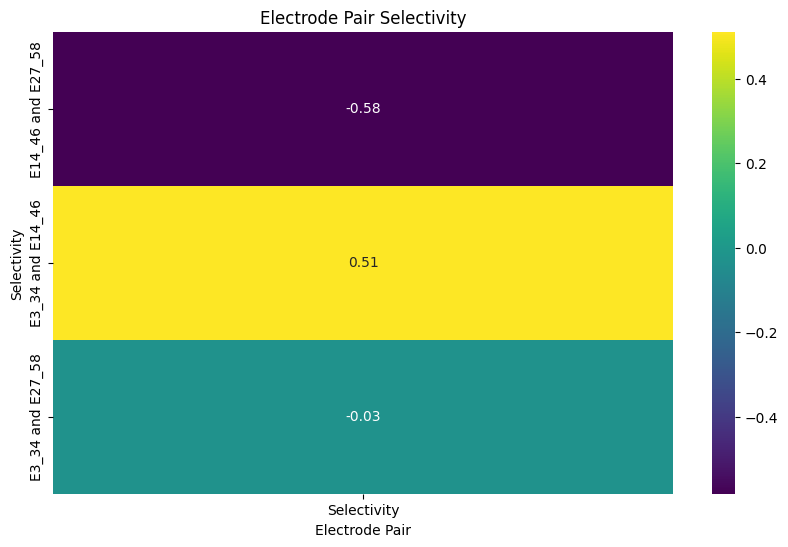

In [21]:
# Visualize the results with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(selectivity_results.pivot_table(values='Selectivity', index='Electrode Pair'), annot=True, cmap='viridis')
plt.title('Electrode Pair Selectivity')
plt.xlabel('Electrode Pair')
plt.ylabel('Selectivity')
plt.show()